In [30]:
import numpy as np
import scipy
import scipy.stats
import torch as t

import matplotlib.pyplot as plt
from IPython.display import clear_output, display

from torch.nn import Sequential, Linear, ReLU, LeakyReLU, Dropout, Sigmoid

In [31]:
%matplotlib inline

In [32]:
if t.cuda.is_available():
    if t.cuda.device_count()>1:
        device = t.device('cuda:1')
    else:
        device = t.device('cuda')   
else:
    device = t.device('cpu')

In [33]:
device=t.device('cpu') #Overrride the above device choice

Generate the sample 2D distribution: uniform from unit circle.  

In [34]:
angle = np.random.uniform(-np.pi,np.pi,(1000,1)).astype('float32')
data = np.concatenate((np.cos(angle), np.sin(angle)),axis=1)

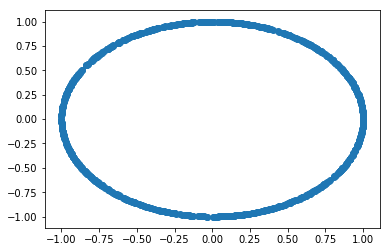

In [35]:
plt.scatter(data[:,0], data[:,1])

In [36]:
data_t = t.from_numpy(data)

In [37]:
data_t

tensor([[-0.5793, -0.8151],
        [ 0.6549,  0.7557],
        [-0.9100, -0.4147],
        ...,
        [-0.4634, -0.8861],
        [-0.8326, -0.5538],
        [ 0.9451,  0.3268]])

In [38]:
discriminator = Sequential(Linear(2,1),  Sigmoid()) #dummy discriminator: please subsitute you own implementation 

In [39]:
discriminator = discriminator.to(device) 

In [40]:
generator = Sequential(Linear(2,2))# dummy generator: please subsitute you own implementation 

In [41]:
generator= generator.to(device)

In [42]:
out_t = generator(t.empty(1000,2, device=device).uniform_(-1,1));

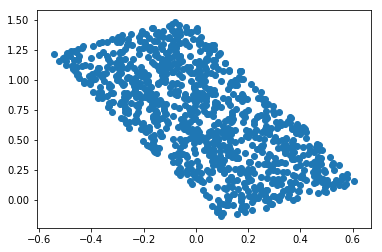

In [43]:
plt.scatter(out_t.data.cpu().numpy()[:,0],out_t.data.cpu().numpy()[:,1])

In [44]:
d_optimizer = t.optim.Adam(discriminator.parameters(), lr=0.0002)

In [45]:
g_optimizer = t.optim.Adam(generator.parameters(), lr=0.0002)

### Problem 1

Implement the GAN train loop that will train GAN to generate from the sample distribution.  

### Problem 2

Use another sampling distribution. One that is not concentrated on a line e.g. an ellipse. 